# Smartphone activity dataset

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

#### Description of experiment

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

#### Attribute information

For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
Triaxial Angular velocity from the gyroscope.
A 561-feature vector with time and frequency domain variables.
Its activity label.
An identifier of the subject who carried out the experiment.
Relevant papers

Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. International Workshop of Ambient Assisted Living (IWAAL 2012). Vitoria-Gasteiz, Spain. Dec 2012

Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, Jorge L. Reyes-Ortiz. Energy Efficient Smartphone-Based Activity Recognition using Fixed-Point Arithmetic. Journal of Universal Computer Science. Special Issue in Ambient Assisted Living: Home Care. Volume 19, Issue 9. May 2013

Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine. 4th International Workshop of Ambient Assited Living, IWAAL 2012, Vitoria-Gasteiz, Spain, December 3-5, 2012. Proceedings. Lecture Notes in Computer Science 2012, pp 216-223.

Jorge Luis Reyes-Ortiz, Alessandro Ghio, Xavier Parra-Llanas, Davide Anguita, Joan Cabestany, Andreu Català. Human Activity and Motion Disorder Recognition: Towards Smarter Interactive Cognitive Environments. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.



In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.options.mode.chained_assignment = None 

### Read data

In [2]:
df = pd.read_csv('train.csv')

## Data Exploration

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Output classes are

In [4]:
set(df.Activity)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

### Label these classes

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])

### Now the output classes are

In [6]:
set(df.Activity)

{0, 1, 2, 3, 4, 5}

### Number of subjects

In [7]:
set(df.iloc[:,-2])

{1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30}

## Begin by test train split

In [11]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Start preprocessing

In [12]:
X_train.shape

(4925, 562)

### We will need to start prepping data for preprocessing, i.e scale it, then remove collinearity

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train.iloc[:,1:] = scaler.fit_transform(X_train.iloc[:,1:])
y_train = scaler.fit_transform(y_train)

/Users/nemo/anaconda/envs/kaggleShit/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nemo/anaconda/envs/kaggleShit/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/nemo/anaconda/envs/kaggleShit/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D,

In [91]:
X_test.iloc[:,:] = scaler.fit_transform(X_test.iloc[:,:])
y_test = scaler.fit_transform(y_test)

/Users/nemo/anaconda/envs/kaggleShit/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/nemo/anaconda/envs/kaggleShit/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### Look for correlations

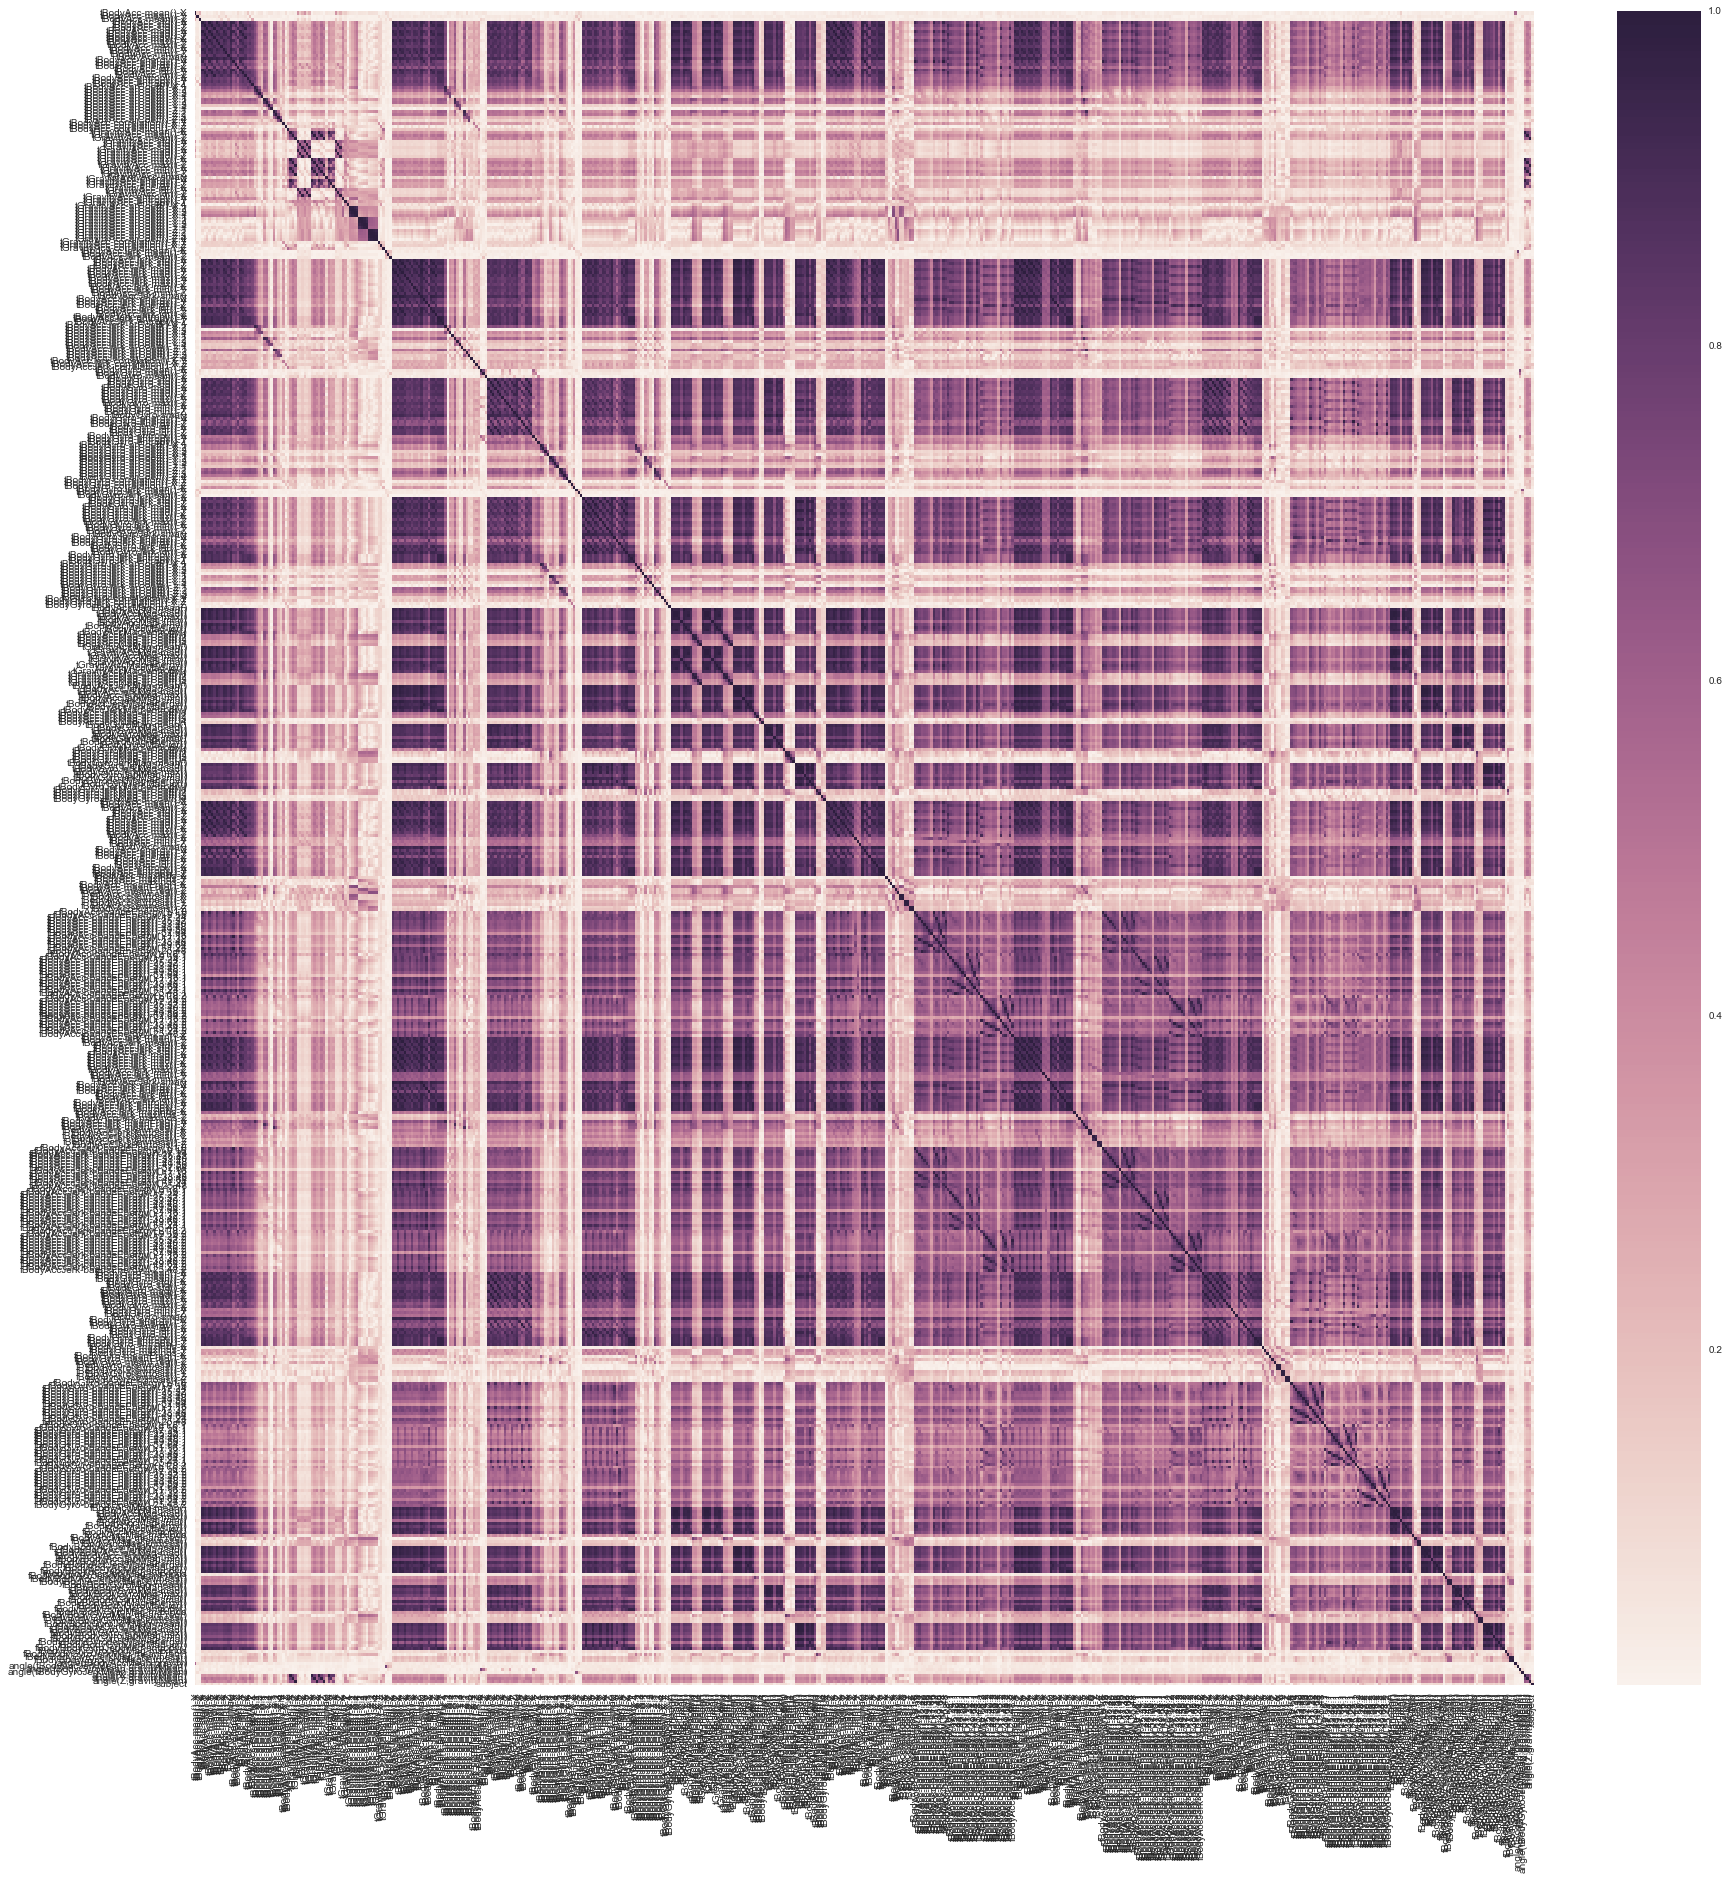

In [14]:
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr().abs())

### Very correlated. I will now drop variables that have correlations greater than 0.75

In [15]:
#tBodyAccCols = df.columns[df.columns.str.contains('tBodyAcc-') == True]
tBodyAccCols = X_train.select_dtypes(['int64', 'float64']).columns
tBodyAccCols = tBodyAccCols.drop('subject')

In [16]:
bodyAccColDf =  X_train[tBodyAccCols].corr().abs().unstack().reset_index()
bodyAccColDf = bodyAccColDf[bodyAccColDf.level_0 != bodyAccColDf.level_1]
deletedCols = []
while bodyAccColDf[0].max() > 0.75:
    a = bodyAccColDf[bodyAccColDf[0] == bodyAccColDf[0].max()]
    if df[a.iloc[0,0]].sum() > df[a.iloc[0,1]].sum():
        tBodyAccCols = tBodyAccCols.drop(a.iloc[0,0])
        deletedCols.append(a.iloc[0,0])
    else:
        tBodyAccCols = tBodyAccCols.drop(a.iloc[0,1])
        deletedCols.append(a.iloc[0,1])
    bodyAccColDf =  X_train[tBodyAccCols].corr().abs().unstack().reset_index()
    bodyAccColDf = bodyAccColDf[bodyAccColDf.level_0 != bodyAccColDf.level_1]

In [18]:
len(tBodyAccCols)

161

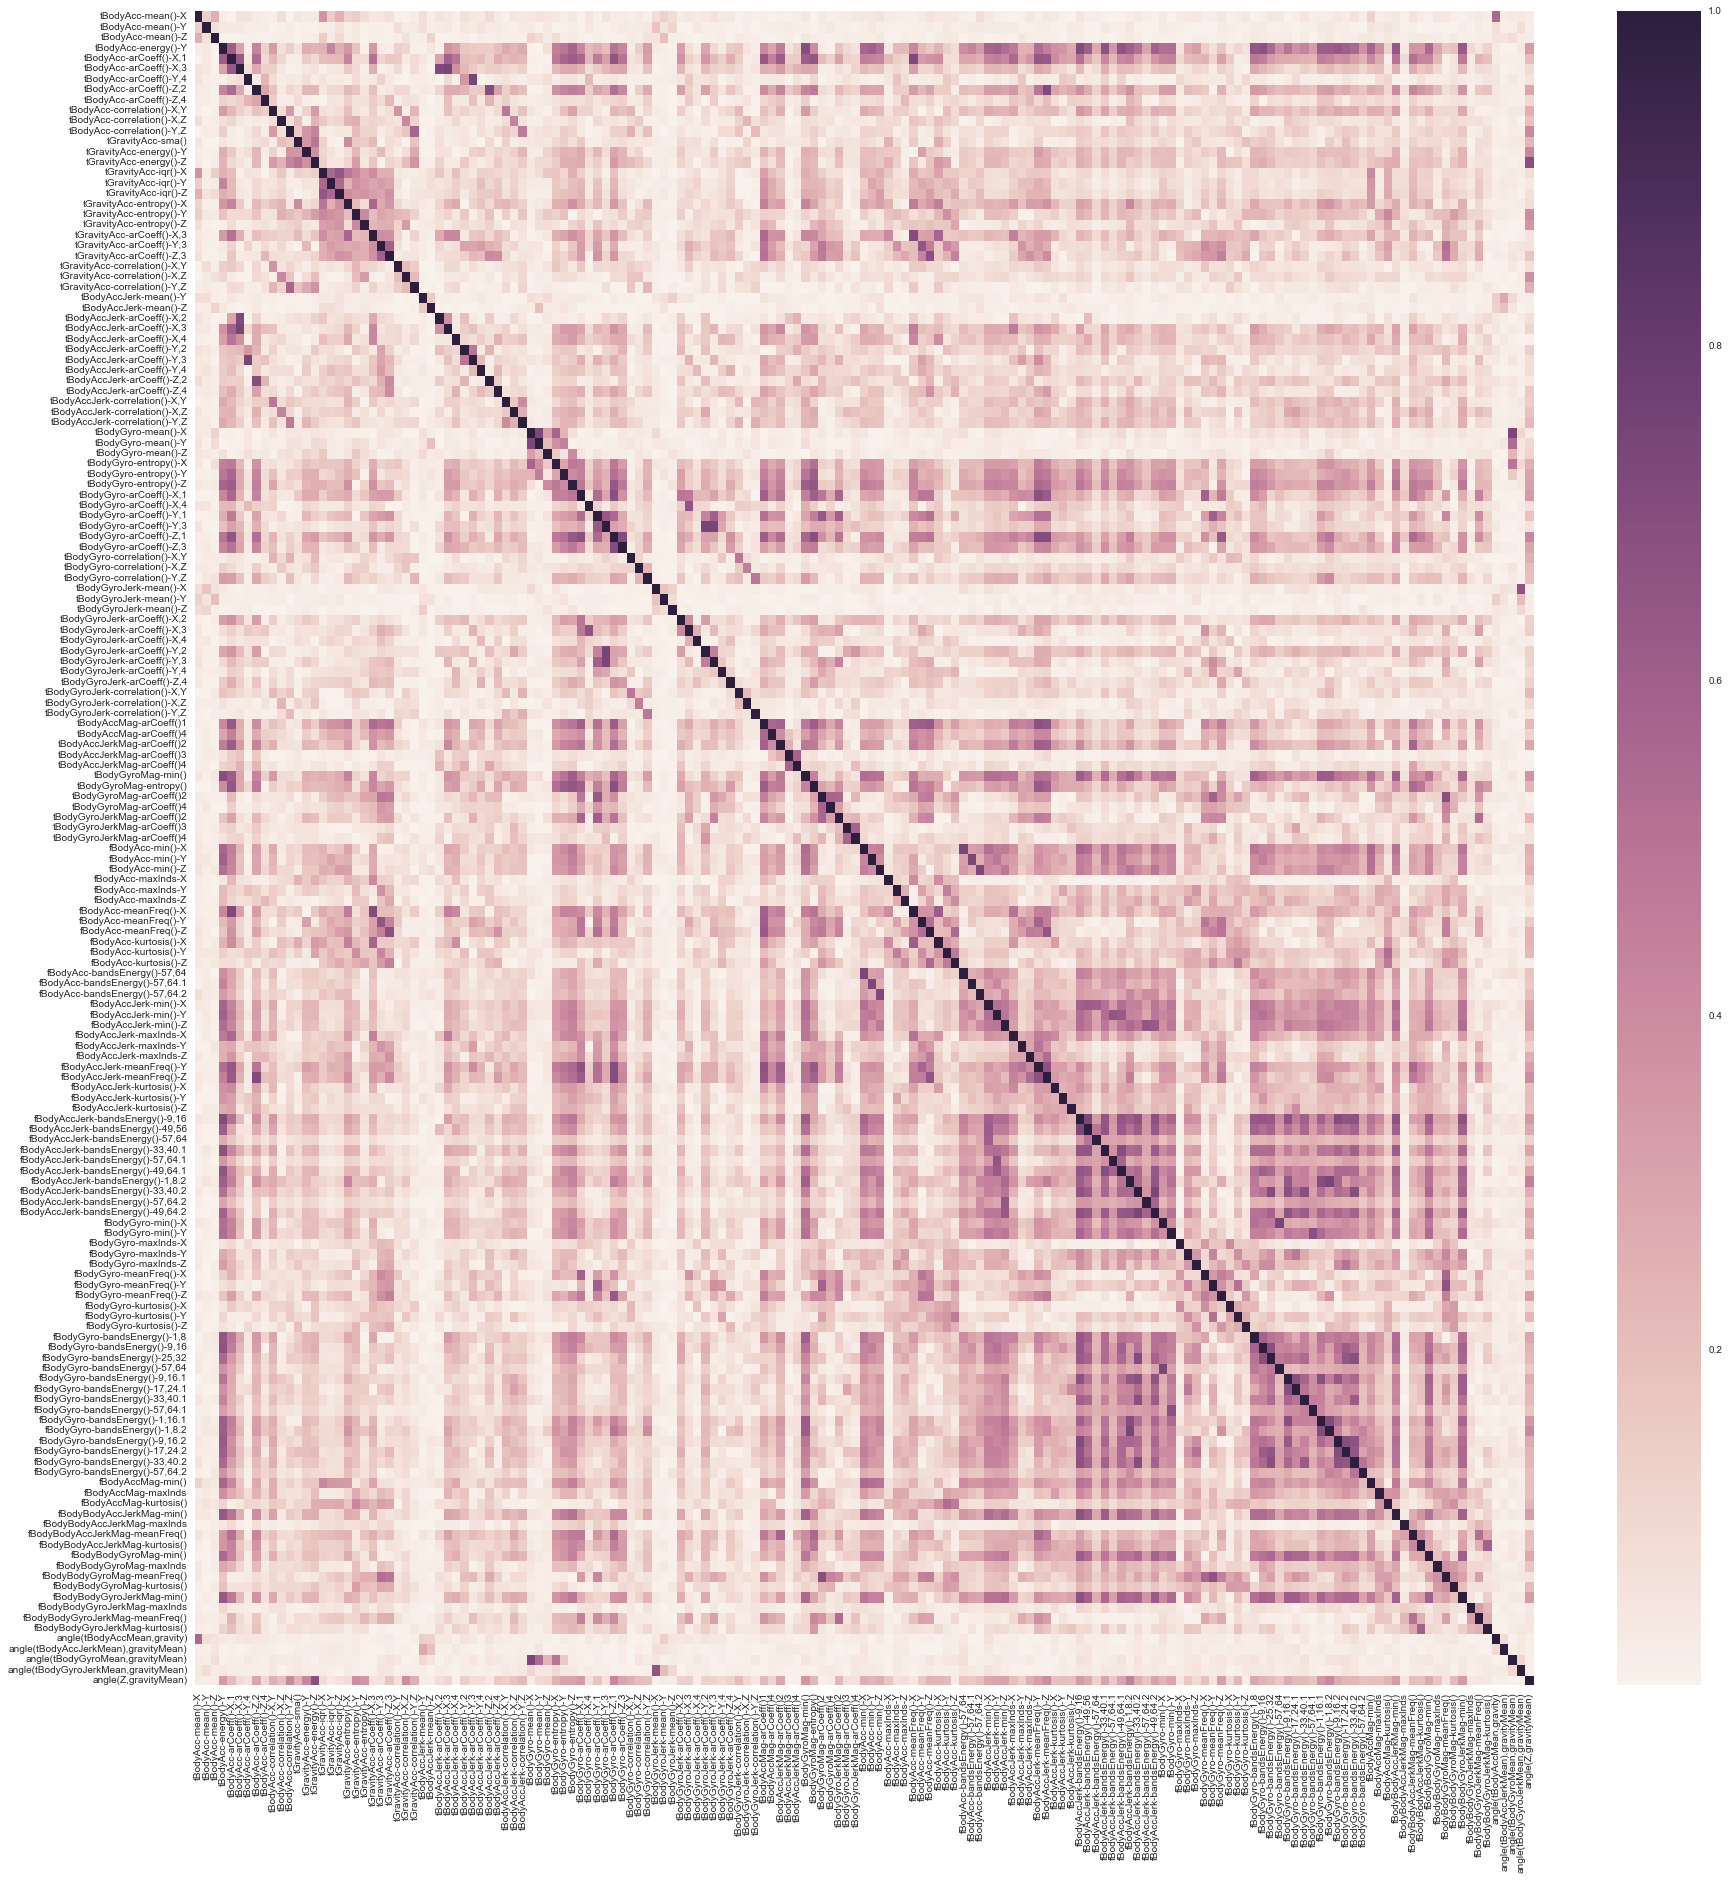

In [19]:
plt.figure(figsize = (30,30))
sns.heatmap(X_train[tBodyAccCols].corr().abs())

### Now that we have reduced the effect of collinearity by dropping correlated variables, I will now start playing with PCA, t-SNE for further dimensionality reduction and data visualization

In [20]:
selectedFeatures = list(tBodyAccCols) + ['subject'] 

In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train[selectedFeatures])
pca.explained_variance_

array([ 0.48113263,  0.2780218 ])

/Users/nemo/anaconda/envs/kaggleShit/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


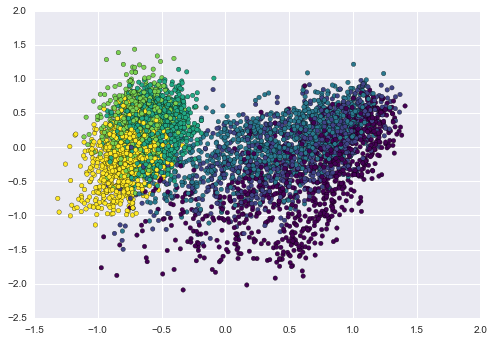

In [41]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.set_cmap('viridis')
plt.legend()

### Not very good. With three components?

In [47]:
pca = decomposition.PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train[selectedFeatures])
pca.explained_variance_

array([ 0.48113263,  0.2780218 ,  0.19072787])

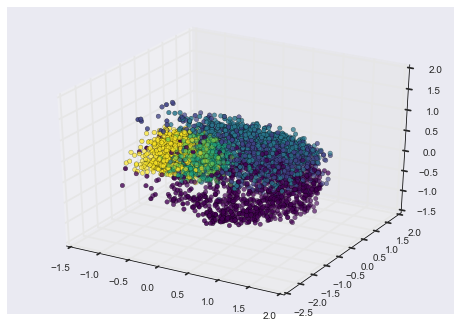

In [48]:
#bodyacc = df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'Activity']]
from mpl_toolkits.mplot3d import Axes3D
threeD = plt.figure().gca(projection='3d')
threeD.scatter(X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2], 
               c = y_train)

### They don't look very separable.  Anyway let us setup a pipeline and get some classifiers running

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RFClassifier = RandomForestClassifier(random_state = 42, max_depth = 4, n_estimators = 100)
X_train_tree = RFClassifier.fit(X_train_pca, (y_train*10).astype(int))
score = cross_val_score(RFClassifier, X_train_pca, (y_train*10).astype(int))
print score

[ 0.78284672  0.80633374  0.80719951]


In [77]:
from sklearn import pipeline
from sklearn import grid_search
pca = decomposition.PCA()
RFClassifier = RandomForestClassifier(random_state = 42)
pcaRF_pipeline = pipeline.Pipeline(steps = [('pca', pca), ('tree', RFClassifier)])
param_grid = dict(pca__n_components = [20, 30, 50], tree__max_depth = [3,4,5,6], tree__n_estimators = [1,10,100, 1000])
gs_cv = grid_search.GridSearchCV(pcaRF_pipeline, param_grid).fit(X_train, (y_train*10).astype(int))

In [78]:
gs_cv.best_params_

{'pca__n_components': 50, 'tree__max_depth': 6, 'tree__n_estimators': 1000}

In [88]:
pcaRF_pipeline.set_params(pca__n_components = 50, tree__max_depth = 6, tree__n_estimators = 100)

Pipeline(steps=[('pca', PCA(copy=True, n_components=50, whiten=False)), ('tree', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

### PCA + Random forests

In [94]:
fitted = pcaRF_pipeline.fit(X_train[selectedFeatures], (y_train*10).astype(int))
y_pred = pcaRF_pipeline.predict(X_test[selectedFeatures])
print(classification_report((y_test*10).astype(int), y_pred))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93       467
          2       0.88      0.63      0.74       434
          4       0.77      0.89      0.82       445
          6       0.85      0.91      0.88       405
          8       0.91      0.75      0.82       345
         10       0.82      0.93      0.87       331

avg / total       0.85      0.85      0.84      2427



In [79]:
pca = decomposition.PCA(n_components = 50)
X_train_pca = pca.fit_transform(X_train[selectedFeatures])
pca.explained_variance_
RFClassifier = RandomForestClassifier(random_state = 42, max_depth = 6, n_estimators = 1000)
X_train_tree = RFClassifier.fit(X_train_pca, (y_train*10).astype(int))
score = cross_val_score(RFClassifier, X_train_pca, (y_train*10).astype(int))
print score

[ 0.83941606  0.86906212  0.85173887]


### Random forests+PCA might not be the best. Doesn't seem to converge. Honestly PCA doesnt do very well with large dimensional data

### Let us try PCA + KNN classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
pca = decomposition.PCA()
pcaknn_pipeline = pipeline.Pipeline(steps = [('pca', pca), ('knn', neigh)])
param_grid = dict(pca__n_components = [2, 3, 10, 30, 50], knn__n_neighbors = [1,3,6])
gs_cv = grid_search.GridSearchCV(pcaknn_pipeline, param_grid).fit(X_train, (y_train*10).astype(int))

In [83]:
gs_cv.best_params_

{'knn__n_neighbors': 1, 'pca__n_components': 50}

In [97]:
pcaknn_pipeline.set_params(pca__n_components = 50, knn__n_neighbors = 1)

Pipeline(steps=[('pca', PCA(copy=True, n_components=50, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])

### Prediction result: PCA + KNN

In [98]:
fitted = pcaknn_pipeline.fit(X_train[selectedFeatures], (y_train*10).astype(int))
y_pred = pcaknn_pipeline.predict(X_test[selectedFeatures])
print(classification_report((y_test*10).astype(int), y_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       467
          2       0.89      0.86      0.87       434
          4       0.87      0.91      0.89       445
          6       0.96      0.99      0.97       405
          8       0.97      0.90      0.94       345
         10       0.94      0.98      0.96       331

avg / total       0.94      0.94      0.94      2427



## t-SNE

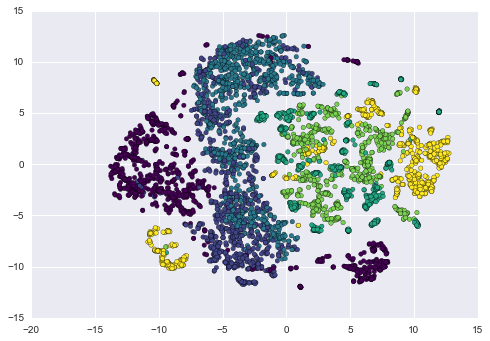

In [42]:
from sklearn.manifold import TSNE
X_train_tsne = TSNE(learning_rate=1000).fit_transform(X_train[selectedFeatures])
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = y_train)